In [4]:
# Clone the entire repo.
!git clone -l -s https://github.com/gabrielgyns/DogsCatsTraining.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 14009, done.
remote: Counting objects: 100% (14009/14009), done.
remote: Compressing objects: 100% (14006/14006), done.
remote: Total 14009 (delta 2), reused 14005 (delta 1), pack-reused 0
Receiving objects: 100% (14009/14009), 302.56 MiB | 13.36 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Checking out files: 100% (14021/14021), done.
/content/cloned-repo
README.md  test  train


In [6]:
# Importando TensorFlow e Keras

import tensorflow as tf
import keras as K

print("Versão do TensorFlow:", tf.__version__)
print("Versão do Keras:", K.__version__)


Versão do TensorFlow: 1.14.0
Versão do Keras: 2.2.5


In [0]:
# Imports
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

**CONSTRUÇÃO DE REDE**

In [8]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

W0901 16:50:33.851886 139684372592512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [9]:
# Passo 1 - Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

W0901 16:50:33.913547 139684372592512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0901 16:50:33.928343 139684372592512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [10]:
# Passo 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

W0901 16:50:33.970894 139684372592512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [0]:
# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

In [0]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [0]:
# Passo 3 - Flattening (Achatamento)
classifier.add(Flatten())

In [0]:
# Passo 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [15]:
# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

W0901 16:50:34.091834 139684372592512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0901 16:50:34.128175 139684372592512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3657: The name tf.log is deprecated. Please use tf.math.log instead.

W0901 16:50:34.135127 139684372592512 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


**TREINAMENTO DE REDE**

In [0]:
# Criando os objetos train_datagen e validation_datagen com as regras de pré-processamento das imagens
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
# Pré-processamento das imagens de treino e validação
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Criando o diretório de validação
!mkdir validation
validation_set = validation_datagen.flow_from_directory('validation',
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'binary')

Found 14000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [18]:
# Executando o treinamento
classifier.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 5,
                         validation_data = validation_set,
                         validation_steps = 2000)

W0901 16:50:37.958947 139684372592512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/5
8000/8000 [==============================] - 949s 119ms/step - loss: 0.4118 - acc: 0.8047
Epoch 2/5
8000/8000 [==============================] - 927s 116ms/step - loss: 0.2029 - acc: 0.9169
Epoch 3/5
8000/8000 [==============================] - 918s 115ms/step - loss: 0.1081 - acc: 0.9587
Epoch 4/5
8000/8000 [==============================] - 881s 110ms/step - loss: 0.0721 - acc: 0.9737
Epoch 5/5
8000/8000 [==============================] - 856s 107ms/step - loss: 0.0558 - acc: 0.9802


**FAZENDO AS PREDIÇÕES**

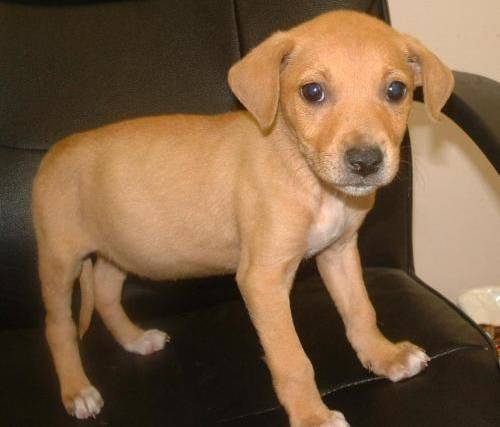

In [32]:
# Primeira Imagem
import numpy as np
from keras.preprocessing import image
from IPython.display import Image

test_image = image.load_img('test/dog.117.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Cachorro'
else:
    prediction = 'Gato'

Image(filename='test/dog.117.jpg')

In [33]:
# Previsão da primeira imagem
prediction

'Cachorro'

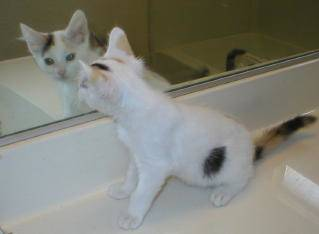

In [35]:
# Segunda Imagem
test_image = image.load_img('test/cat.80.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Cachorro'
else:
    prediction = 'Gato'

Image(filename='test/cat.80.jpg')

In [36]:
# Previsão da segunda imagem
prediction

'Gato'

In [46]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving puppy-dog.jpg to puppy-dog (1).jpg
User uploaded file "puppy-dog.jpg" with length 174090 bytes


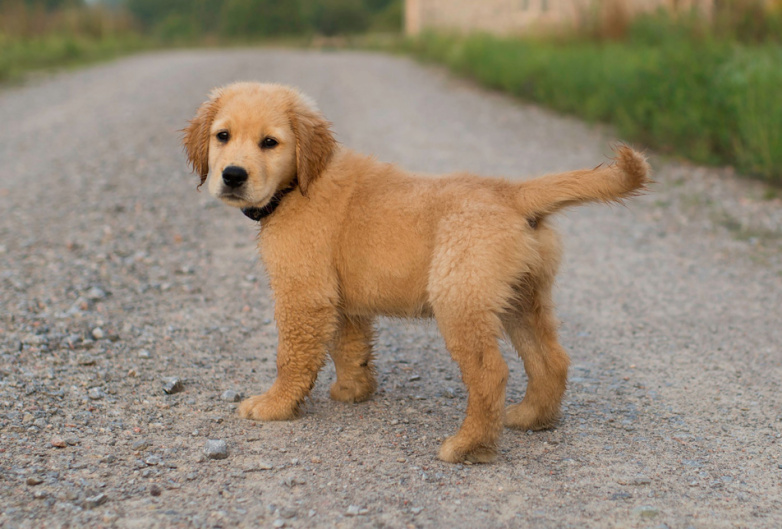

In [54]:
test_image = image.load_img('puppy-dog.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Cachorro'
else:
    prediction = 'Gato'

Image(filename='puppy-dog.jpg')

In [56]:
# Imagem baixada da internet
prediction

'Cachorro'

In [0]:
# Salvar modelo
classifier.save('modelo_treinado/modelo_DogCatTraining.h5')

**Melhorias adicionais para este modelo:**

    
*    Além disso, aumentar o redimensionamento da imagem de 64x64 para 256x256 deve levar a melhores resultados devido à resolução mais alta.
*    Aumentar o tamanho do lote de 32 para 64 também pode levar a melhores resultados.
*    Usar imagens sintéticas rotacionando a imagem principal, técnica conhecida como Dataset Augmentation.
*    Alterar a arquitetura da rede incluindo mais uma camada convolucional.
*    Avaliar outras métricas do modelo e ajustar os hiperparâmetros de acordo.
*    Experimentar outros algoritmos de otimização.


